<a href="https://colab.research.google.com/github/issabellasafitri/UAS-Data-Mining_Kel-4/blob/main/Project_UAS_Data_Mining_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio
!pip install unidecode
!pip install Sastrawi
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-0ccdua9s
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-0ccdua9s
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

import nltk diatas adalah library yang digunakan untuk pengolahan data bahasa manusia

## **Import** 

In [2]:
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170

import twint
import nest_asyncio
import pandas as pd

from google.colab import files

**crawling twiter**

In [3]:
 #get data
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

config.Search = "Piala Dunia 2022"
config.Limit = 12000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)
'Done'

(12003, 38)


'Done'

Kita melakukan Crawling data dari twitter yaitu untuk pengambilan data dari media sosial, kemudian dikumpulkan menjadi satu untuk diolah dan dibentuk agar menjadi sebuah data yang dapat diprogram.

In [4]:
data.to_json(r'data_tweet.json')
data.to_csv(r'data_tweet.csv', index=False, encoding='utf8')
'Done'

'Done'

### **preprocessing dan visualisasi**

In [5]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/data_tweet.csv

mkdir: cannot create directory ‘data’: File exists
--2022-12-29 15:23:50--  https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/data_tweet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6143208 (5.9M) [text/plain]
Saving to: ‘data/data_tweet.csv.3’

data_tweet.csv.3    100%[===================>]   5.86M  --.-KB/s    in 0.08s   

2022-12-29 15:23:51 (73.9 MB/s) - ‘data/data_tweet.csv.3’ saved [6143208/6143208]



In [6]:
data1 = pd.read_csv("data/data_tweet.csv", low_memory = False, encoding='utf8')

In [7]:
df = data1[['tweet']]
df.at[0,'tweet']

'Head to Head Timnas Indonesia dan Thailand, Gajah Putih Jauh Superior  https://t.co/9FXtCKbgfi #PialaAFFCup #PialaDunia2022 #Thailand #TimnasIndonesia'

Untuk mengeluarkan data yang ada di dalam tweet tersebut

In [8]:
df.duplicated().sum()

306

Bisa kita lihat didalam data tersebut terdapat duplikasi data sebanyak 306 data.


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

Pada data tersebut telah di drop sehingga tidak ada lagi duplikasi dalam data tersebut. 

**Tokenisasi, Stopword & Encoding**

In [11]:
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Kita menggunakan Sastrawi_StopWords_id untuk menghilangkan karakter atau kata yang tidak diperlukan.

In [12]:
Sastrawi_StopWords_id.add('piala')
Sastrawi_StopWords_id.add('dunia')
Sastrawi_StopWords_id.add('2022')
Sastrawi_StopWords_id.add('jadi')
Sastrawi_StopWords_id.add('pialadunia2022')
Sastrawi_StopWords_id.add('jadi')
Sastrawi_StopWords_id.add('qatar2022')

In [13]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    for i,t in enumerate(Tokens):
      if t in slang.keys():
        Tokens[i] = slang[t]
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

Digunakan untuk pemisah kata, simbol, prase, dan entitas penting lainnya. Tokenisasi diperlukan untuk menghindari masalah semantic saat pemrosessan model-model natural language, dan menghindari kompleksitas mengolah langsung pada string asal.

In [14]:
slang = {'gan':'juragan', 'jgn':'jangan', 'yg':'yang', 'dgn':'dengan', 'u': 'you', 'acu':'aku', 'gitu':'begitu', 'ndak':'tidak', 'sesok':'besok', 'udh':'sudah', 'sdh':'sudah', 'dlm':'dalam', 'dgn':'dengan', 'sm':'sama', 'utk':'untuk', 'akn':'akan',
         'stlh':'setelah', 'stlah':'setelah','stelah':'setelah', 'mrupakan':'merupakan', 'ttg':'tentang', 'kpd':'kepada', 'krn':'karena', 'ngr':'negara', 'dukun':'dukung', 'ribu':'ribut',
         'emng':'memang', 'kalo':'kalau', 'jk':'jika', 'kl':'kalau', 'klo':'kalau', 'thn':'tahun', 'ngabss':'abang', 'ngab':'abang', 'bang':'abang', 'sgt':'sangat', 'gak':'tidak', 'psl':'pasal', 'org':'orang',
         'tsb':'tersebut', 'sbg':'sebagai', 'hrs':'harus', 'gitu':'begitu', 'skrg':'sekarang', 'gue':'saya', 'gua':'saya', 'gw':'saya', 'bkn':'bukan', 'bln':'bulan', 'kek':'kaya', 'moga':'semoga',
         'you':'kamu', 'yaa':'iya', 'spt':'seperti', 'mjd':'menjadi', 'cmiiw':'correct me if iam wrong', 'msh':'masih', 'tntu':'tentu', 'sbuah':'sebuah', 'klu':'kalau', 'elu':'kamu', 'lu':'kamu',
         'tpi':'tetapi', 'plg':'pulang', 'kagak':'tidak', 'mmg':'memang', 'ijin':'izin', 'shg':'sehingga', 'nder':'abang', 'yth':'yang terhormat', 'kyk':'kaya', 'jdi':'jadi', 'jelas2':'jelas-jelas',
         'loe':'kamu', 'udh':'sudah', 'uda':'sudah', 'bpk':'bapak', 'sby':'surabaya', 'taun':'tahun', 'dar':'dari', 'sblm':'sebelum', 'brp':'berapa', 'ente':'kamu','terdpt':'terdapat',
         'dng':'dong', 'bgmn':'bagaimana', 'spy':'supaya', 'psl':'pasal', 'psal':'pasal', 'msk':'masuk', 'materiil':'materil', 'tntng':'tentang', 'mrpkn':'merupakan', 'cilaka':'celaka', 'mnrt':'menurut',
         'masy':'masa', 'koq':'kok', 'org2':'orang-orang', 'org':'orang', 'ntar':'nanti', 'trs':'terus', 'dnyatakn':'dinyatakan', 'prstitusi':'prostitusi', 'prbuatany':'perbuatannya', 'doang':'saja',
         'yuk':'ayo', 'trus':'terus', 'thd':'terhadap', 'bgt':'banget', 'scr':'secara', 'sob':'sobat', 'emg':'memang','cuman':'cuma', 'tsk':'tersangka', 'erti':'arti', 'aju':'aku',
         'knp':'kenapa', 'bnyk':'banyak', 'adlh':'adalah', 'gmn':'gimana', 'dri':'dari', 'ttp':'tetap', 'gpp':'tidak apa-apa', 'btw':'by the way', 'min':'admin', 
         'mrk':'mereka', 'indo':'indonesia', 'byk':'banyak', 'dukun':'dukung', 'mendukun':'mendukung', 'belom':'belum', 'idup':'hidup', 'idupnya':'hidupnya', 'skarang':'sekarang'}

In [15]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/clean_tweet.csv

mkdir: cannot create directory ‘data’: File exists
--2022-12-29 15:23:51--  https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/clean_tweet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1064830 (1.0M) [text/plain]
Saving to: ‘data/clean_tweet.csv.1’

clean_tweet.csv.1   100%[===================>]   1.01M  --.-KB/s    in 0.05s   

2022-12-29 15:23:51 (19.4 MB/s) - ‘data/clean_tweet.csv.1’ saved [1064830/1064830]



Digunakan untuk memanggil data yang disimpan dalam repository github, data yang ada di repository github merupakan data yang sudah dibersihkan datanya.

In [16]:
data = pd.read_csv("data/clean_tweet.csv", low_memory = False, encoding='utf8')

In [17]:
df.duplicated().sum()

0

### **Analisa Dasar Voyant Tools**

**WORDCLOUD**

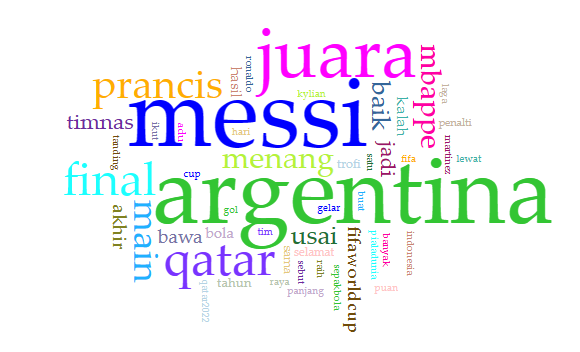

Penggunaan word cloud di atas memudahkan orang yang menganalisa mengetahui kata-kata yang paling sering muncul pada data tweet ini sehingga langkah selanjutnya dapat diputuskan dengan lebih cepat dibandingkan dengan melihat raw data. 

Perbedaan ukuran font pada word cloud menunjukkan seberapa banyak kata muncul dalam data. Semakin besar ukuran font berarti semakin sering kemunculan kata
tersebut. 

Pada visual ini kata yang frekuensinya paling banyak muncul adalah **"argentina"**,**"messi"** ,**"juara"**, **qatar**, **"final"**,**"prancis"**, **"menang"**, **"mbappe"**, **"main"**. Kata-kata tersebut cukup mudah dikenali bagi penggemar sepak bola. Menurut berita, kemenangan piala dunia 2022 yang diselenggarakan di Qatar dimenangkan oleh negara Argentina dengan Messi sebagai pemain yang berhasil mencetak gol, hal tersebut yang sedang dibicarakan oleh pengguna twitter terkait topik piala dunia 2022.

**WORD LINK**

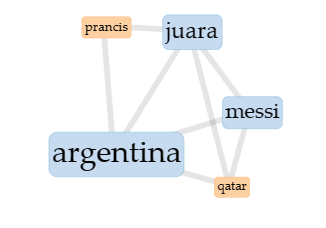

word link digunakan untuk mengetahui kata-kata yang saling berhubungan pada data tweet ini. tebalnya garis dan warna pada word link menunjukkan hubungan kata. pada visual ini kata yang saling berhubungan muncul adalah 

'argentina' <- 'qatar', 'messi', 'juara', 'prancis'.

'messi' <- 'argentina', 'juara','qatar'.

'juara' <- 'prancis','argentina', 'qatar', dan 'messi'.


Pengguna twitter biasa menghubungkan Argentina jika membicarakan qatar, messi, juara dan prancis. Messi juga biasa dibicarakan jika membicarakan argentina, juara dan qatar. Juara dibicarakan jika prancis, argentina, qatar, dan messi. Kasus ini khusus pada saat ini (beberapa saat setelah piala dunia berakhir, kedepannya mungkin akan berubah).  

**WORD TREE**

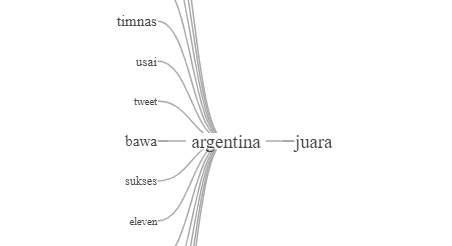

Word Tree digunakan untuk menampilkan hubungan kata dalam kumpulan data, memberikan beberapa konteks untuk penggunaannya. Kata-kata yang muncul lebih sering dalam kombinasi dengan kata yang dipilih sebelumnya ditampilkan dalam ukuran font yang lebih besar. Visualisasi memungkinkan pengguna untuk memilih apakah mereka tertarik pada koneksi sebelum kata atau mengikuti kata

### **Analysis Sentiment**

Sentiment Analysis merupakan proses komputasi untuk menentukan apakah suatu pernyataan bermakna positive, negative atau netral.

In [18]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    !wget -P data/ https://raw.githubusercontent.com/Salmaabidah/DataMining/main/Salma-11190940000032-UAS-DataMining-2022.json
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/network_unp2021.gexf
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py

    !pip install pyLDAvis
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite
    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !pip install unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download xx_sent_ud_sm
    nltk.download('popular')
    
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-12-29 15:23:52--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-12-29 15:23:52 (56.9 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

mkdir: cannot create directory ‘data’: File exists
--2022-12-29 15:23:52--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request s

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 4.7 MB/s 
     |████████████████████████████████| 128 kB 33.2 MB/s 
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32892 sha256=926bffbe5e915cf9f9bb6a51a9388a3f71fad61ca11962a2f00017b86fc1e39f
  Stored in directory: /root/.cache/pip/wheels/75/66/8b/d1acbac7d49f3d98ade76c51ae5d72cec1866131a3b1ad9f82
Successfully built tika
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-29 15:25:22.639166: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.wa

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [19]:
import nltk, warnings; warnings.simplefilter('ignore')
import pandas as pd, taudataNlpTm as tau
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
from nltk.corpus import stopwords
"Done"

'Done'

In [20]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/data_cleantweet_label2.csv

dataSA = pd.read_csv('data/data_cleantweet_label2.csv')
dataSA

mkdir: cannot create directory ‘data’: File exists
--2022-12-29 15:26:40--  https://raw.githubusercontent.com/issabellasafitri/UAS-Data-Mining_Kel-4/main/data_cleantweet_label2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1088232 (1.0M) [text/plain]
Saving to: ‘data/data_cleantweet_label2.csv’

data_cleantweet_lab 100%[===================>]   1.04M  --.-KB/s    in 0.05s   

2022-12-29 15:26:40 (19.8 MB/s) - ‘data/data_cleantweet_label2.csv’ saved [1088232/1088232]



,label,tweet
0,0,ketua dpr puan maharani nilai tengah langsung ...
1,0,asisten latih timnas prancis akhir kan sebab b...
2,0,starfess top scorer and just
3,0,puan maharani nilai tengah langsung bawa angin...
4,0,ketua dpr puan maharani sebut bawa angin segar...
...,...,...
11699,2,final
11700,2,bayern munich inter mil gelar untun bayern mun...
11701,2,maaf iya belum bukan gimama2 cuma tdk buat ton...
11702,2,tim kayak capek capek extra time tetap fire pi...


Digunakan untuk memanggil data yang disimpan dalam repository github, data yang ada di repository github merupakan data yang sudah diberikan label. kemudian dapat kita lihat terdapat 11704 baris dan 2 kolom.

In [21]:
dataSA.head(), dataSA.shape

(   label                                              tweet
 0      0  ketua dpr puan maharani nilai tengah langsung ...
 1      0  asisten latih timnas prancis akhir kan sebab b...
 2      0                       starfess top scorer and just
 3      0  puan maharani nilai tengah langsung bawa angin...
 4      0  ketua dpr puan maharani sebut bawa angin segar..., (11704, 2))

Data kita lihat 5 tweet teratas dalam dataframe tersebut.

In [22]:
from sklearn.model_selection import train_test_split

seed = 99 # Biasakan menggunakan ini
testSize = 0.2


x_train, x_test, y_train, y_test = train_test_split(dataSA['tweet'], dataSA['label'], 
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

(9363,) (2341,)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(9363, 19125) (2341, 19125)


In [24]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(hidden_layer_sizes=(30, 40))
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print('Akurasi = ', accuracy_score(y_test, y_NN))
print(confusion_matrix(y_test, y_NN))
print(classification_report(y_test, y_NN))

Akurasi =  0.6403246475865015
[[557 174  77]
 [131 461 197]
 [ 82 181 481]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       808
           1       0.56      0.58      0.57       789
           2       0.64      0.65      0.64       744

    accuracy                           0.64      2341
   macro avg       0.64      0.64      0.64      2341
weighted avg       0.64      0.64      0.64      2341



Dapat kita lihat, dimana dengan data yang seimbang yang diambil sebanyak 11704 data, dengan 3901 positive, 3901 negative, dan 3902 netral. Data ini menghasilkan akurasi sebesar 0.6441691584792824 atau 64% dengan menggunakan Algoritma Neural Network. Algoritma ini digunakan karena pada data ini sulit membersihkan data dengan baik. Sehingga algoritma ini digunakan, karena algoritma ini mampu mentoleransi data-data yang masih belum bersih

### **SNA**

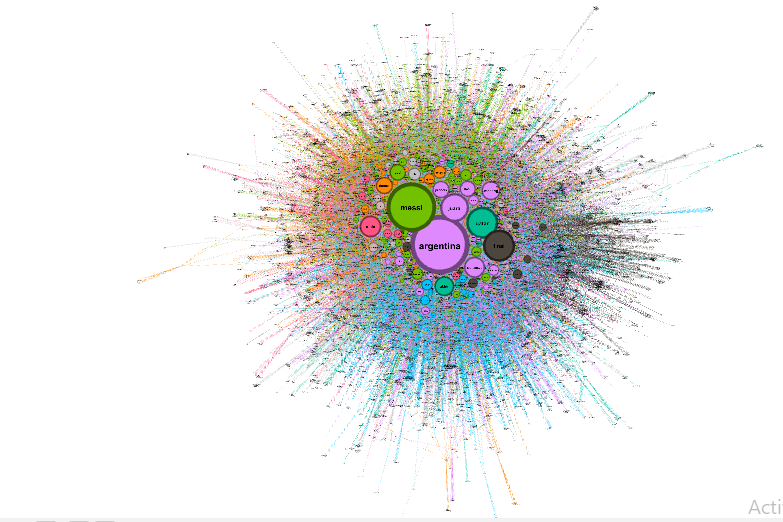

Gephi adalah perangkat lunak atau aplikasi open source yang digunakan untuk network analysis yang meliputi visualisasi, eksplorasi dan manipulasi suatu jaringan sosial. Gephi ini ukuran modularitasnya sebesar 0,288 yang berarti data-data ini terlihat pengelempokannya. Dapat kita lihat topik yang paling banyak diperbincangkan yaitu argentina, selanjutnya messi, dan juara.

**Kesimpulan** : Dapat disimpulkan bahwa kemenangan Argentina pada Piala Dunia menjadi bahan perbincangan utama dalam ajang Piala Dunia di Qatar tahun 2022 ini. Kemenangan tersebut disebut-sebut didapatkan berkat Messi pada extra time, sehingga Messi dalam berita dikatakan sebagai Greatest of All Time (GOAT).